# Perform kernel ridge-less regression using a Representer theorem on synthetic data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [3]:
from lib.kernel_utils import synthetic_analytic_kernel_regression
from lib.kernels import exponential_kernel, linear_kernel
from lib.functions_synthetic_data import norm_squared, exp_norm_squared, exp_norm
from lib.plot_utils import complete_plot

In [4]:
plt.rcParams.update({'font.size': 14})

In [5]:
default_true_function = norm_squared
default_kernel = exponential_kernel
default_seed = 0
default_d = 200
default_n_train_max = 2000
default_n_test = 10000
default_rng = np.random.default_rng(seed=default_seed)
default_kwargs_gen = {'low': -1, 'high': 1}
default_kwargs_fn = {'noise': 0, 'rng': default_rng}
default_kwargs_ker = {'sigma2': None}
default_loss_function = mean_squared_error

In [6]:
default_ylabel = default_loss_function.__name__
default_title = f'Kernel machine regression - syntethic data'
default_legend_label = 'D'

save_folder = f'fig/synthetic_analytic/'
!mkdir -p $save_folder

/bin/bash: port_used: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_port_used'
/bin/bash: wait_until_port_used: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_wait_until_port_used'
/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_module'
/bin/bash: find_port: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_find_port'
/bin/bash: random_number: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_random_number'
/bin/bash: helmod: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_helmod'
/bin/bash: source_helpers: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_source_h

## A concrete example

In [7]:
my_analytic_kernel_regression = synthetic_analytic_kernel_regression()

In [8]:
my_analytic_kernel_regression.sample_train_test_set(default_d, default_n_train_max, default_n_test, seed=default_seed, **default_kwargs_gen)
my_analytic_kernel_regression.compute_true_function(default_true_function, **default_kwargs_fn)
my_analytic_kernel_regression.compute_kernel_train_matrix(default_kernel, **default_kwargs_ker)

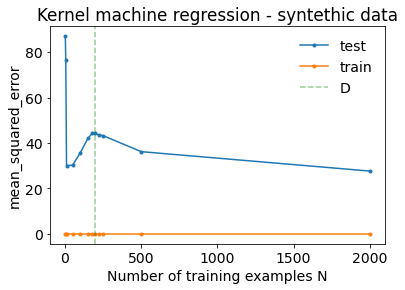

In [34]:
n_trains = np.asarray([2, 5, 10, 50, 100, 150, 180, 200, 220, 250, 500, 2000])
train_test_loss = my_analytic_kernel_regression.pipeline_v(n_train=n_trains,
                                         loss=default_loss_function)
plt.plot(n_trains, train_test_loss[1], '.-', label='test')
plt.plot(n_trains, train_test_loss[0], '.-', label='train')
complete_plot(default_d, default_title, default_ylabel, label=default_legend_label)
plt.savefig(save_folder + 'basic.pdf', bbox_inches='tight')

## Setting up the pipeline

In [11]:
def analytic_pipeline(true_function=default_true_function,
                      kernel=default_kernel,
                      seed=default_seed,
                      d=default_d,
                      n_train_max=None,
                      n_test=default_n_test,
                      kwargs_gen=default_kwargs_gen,
                      kwargs_fn=default_kwargs_fn,
                      kwargs_ker=default_kwargs_ker,
                      loss_function=default_loss_function):
    if n_train_max is None:
        n_train_max = 10*d
    my_analytic_kernel_regression = synthetic_analytic_kernel_regression()
    my_analytic_kernel_regression.sample_train_test_set(d, n_train_max, n_test, seed=seed, **kwargs_gen)
    my_analytic_kernel_regression.compute_true_function(true_function, **kwargs_fn)
    my_analytic_kernel_regression.compute_kernel_train_matrix(kernel, **kwargs_ker)
    n_trains = np.array([ 0.01, 0.025, 0.05, 0.25, 0.5, 0.75, 0.9, 1., 1.1, 1.25, 2.5 , 5.])
    n_trains = (d * n_trains).astype(int)
    n_trains = np.trim_zeros(n_trains)
    train_test_loss = my_analytic_kernel_regression.pipeline_v(n_train=n_trains, loss=loss_function)
    return n_trains, *train_test_loss

analytic_pipeline_v = np.vectorize(analytic_pipeline, otypes=[np.ndarray])

## Varying the seed - i.e. new random samples

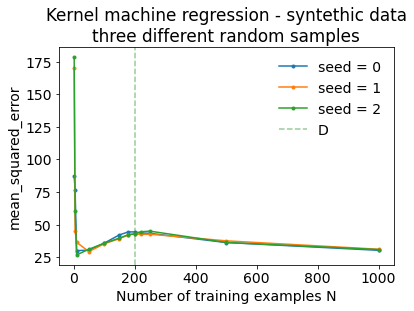

In [20]:
seeds = [0, 1, 2]
train_test_loss = analytic_pipeline_v(seed=seeds)

for i, seed in enumerate(seeds):
    plt.plot(train_test_loss[i][0], train_test_loss[i][2], '.-', label=f'seed = {seed}')
    
complete_plot(default_d, 
              default_title + '\nthree different random samples',
              default_ylabel,
              default_legend_label)
plt.savefig(save_folder + 'different_samples.pdf', bbox_inches='tight')

## Varying the kernel size 

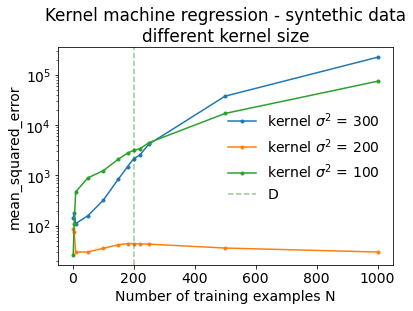

In [21]:
kwargs_ker = [{'sigma2': 300}, {'sigma2': 200}, {'sigma2': 100}]

train_test_loss = analytic_pipeline_v(kwargs_ker=kwargs_ker)

for i, ker in enumerate(kwargs_ker):
    plt.plot(train_test_loss[i][0], train_test_loss[i][2], '.-', label=f"kernel $\sigma^2$ = {ker['sigma2']}")

plt.yscale('log')
complete_plot(default_d, 
              default_title + '\ndifferent kernel size',
              default_ylabel,
              default_legend_label)
plt.savefig(save_folder + 'different_kernel_size.pdf', bbox_inches='tight')

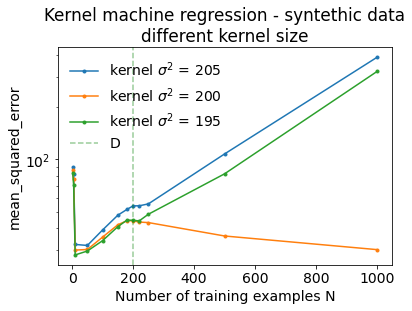

In [22]:
kwargs_ker = [{'sigma2': 205}, {'sigma2': 200}, {'sigma2': 195}]

train_test_loss = analytic_pipeline_v(kwargs_ker=kwargs_ker)

for i, ker in enumerate(kwargs_ker):
    plt.plot(train_test_loss[i][0], train_test_loss[i][2], '.-', label=f"kernel $\sigma^2$ = {ker['sigma2']}")

plt.yscale('log')
complete_plot(default_d, 
              default_title + '\ndifferent kernel size',
              default_ylabel,
              default_legend_label)
plt.savefig(save_folder + 'different_kernel_size_closer.pdf', bbox_inches='tight')

## Varying the dimensionality

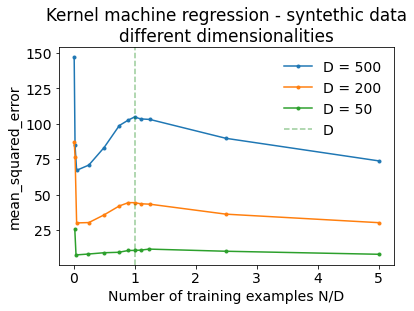

In [23]:
d_s = [500, 200, 50]
    
train_test_loss = analytic_pipeline_v(d=d_s)

for i, d in enumerate(d_s):
    plt.plot(train_test_loss[i][0]/d, train_test_loss[i][2], '.-', label=f'D = {d}')
complete_plot(1,
              default_title + '\ndifferent dimensionalities',
              default_ylabel,
              default_legend_label)
plt.xlabel('Number of training examples N/D')
plt.savefig(save_folder + 'different_dimensionalities.pdf', bbox_inches='tight')

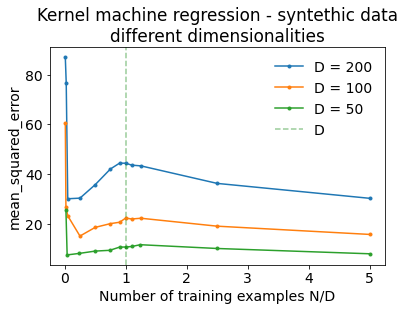

In [24]:
d_s = [200, 100, 50]
    
train_test_loss = analytic_pipeline_v(d=d_s)

for i, d in enumerate(d_s):
    plt.plot(train_test_loss[i][0]/d, train_test_loss[i][2], '.-', label=f'D = {d}')
complete_plot(1,
              default_title + '\ndifferent dimensionalities',
              default_ylabel,
              default_legend_label)
plt.xlabel('Number of training examples N/D')
plt.savefig(save_folder + 'different_dimensionalities_smaller.pdf', bbox_inches='tight')

## Varying the true function

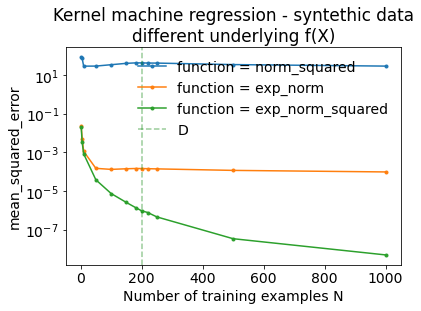

In [25]:
true_functions = [
    norm_squared,
    exp_norm,
    exp_norm_squared,
]

train_test_loss = analytic_pipeline_v(true_function=true_functions)

for i, true_function in enumerate(true_functions):
    plt.plot(train_test_loss[i][0], train_test_loss[i][2], '.-', label=f"function = {true_function.__name__}")
plt.yscale('log')
complete_plot(default_d,
              default_title + '\ndifferent underlying f(X)',
              default_ylabel,
              default_legend_label)
plt.savefig(save_folder + 'different_functions.pdf', bbox_inches='tight')

## Varying the function noise

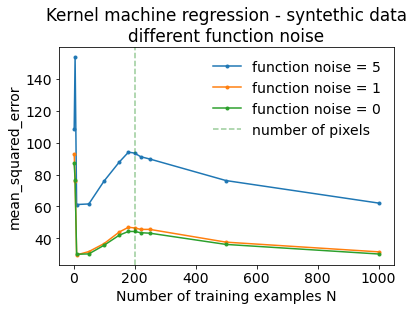

In [30]:
kwargs_fn = [{'noise': 5, 'rng': default_rng},
             {'noise': 1, 'rng': default_rng},
             {'noise': 0, 'rng': default_rng}]

train_test_loss = analytic_pipeline_v(kwargs_fn=kwargs_fn)

for i, kwarg_fn in enumerate(kwargs_fn):
    plt.plot(train_test_loss[i][0], train_test_loss[i][2], '.-', label=f"function noise = {kwarg_fn['noise']}")
complete_plot(default_d,
              default_title + '\ndifferent function noise',
              default_ylabel)
plt.savefig(save_folder + 'different_function_noise.pdf', bbox_inches='tight')

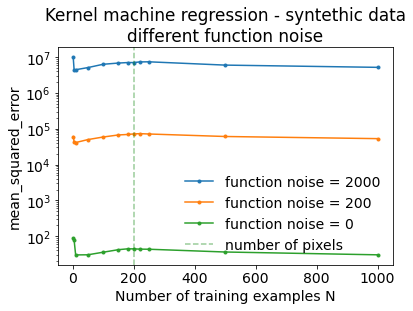

In [31]:
kwargs_fn = [{'noise': 2000, 'rng': default_rng},
             {'noise': 200, 'rng': default_rng},
             {'noise': 0, 'rng': default_rng}]

train_test_loss = analytic_pipeline_v(kwargs_fn=kwargs_fn)

for i, kwarg_fn in enumerate(kwargs_fn):
    plt.plot(train_test_loss[i][0], train_test_loss[i][2], '.-', label=f"function noise = {kwarg_fn['noise']}")
plt.yscale('log')
complete_plot(default_d,
              default_title + '\ndifferent function noise',
              default_ylabel)
plt.savefig(save_folder + 'different_function_noise_extreme.pdf', bbox_inches='tight')

## Varying the sampling space

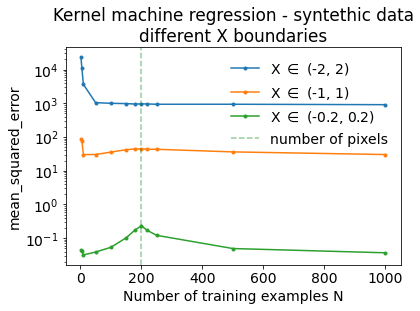

In [32]:
kwargs_gen = [{'low': -2, 'high': 2},
             {'low': -1, 'high': 1},
             {'low': -0.2, 'high': 0.2},]

train_test_loss = analytic_pipeline_v(kwargs_gen=kwargs_gen)

for i, kwarg_gen in enumerate(kwargs_gen):
    plt.plot(train_test_loss[i][0], train_test_loss[i][2], '.-', label=f"X $\in$ ({kwarg_gen['low']}, {kwarg_gen['high']})")
plt.yscale('log')
complete_plot(default_d,
              default_title + '\ndifferent X boundaries',
              default_ylabel)
plt.savefig(save_folder + 'different_x_boundaries.pdf', bbox_inches='tight')

## Different kernel function

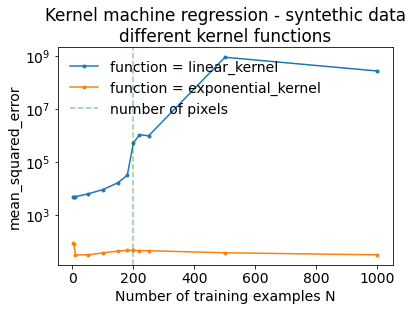

In [33]:
kernel_functions = [
    linear_kernel,
    exponential_kernel,
]

train_test_loss = analytic_pipeline_v(kernel=kernel_functions)

for i, kernel_function in enumerate(kernel_functions):
    plt.plot(train_test_loss[i][0], train_test_loss[i][2], '.-', label=f"function = {kernel_function.__name__}")
plt.yscale('log')
complete_plot(default_d,
              default_title + '\ndifferent kernel functions',
              default_ylabel)
plt.savefig(save_folder + 'different_kernel_functions.pdf', bbox_inches='tight')